# Clase 25: Otros temas de estadística

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Bondad de ajuste

En la clase pasada vimos que para errores gaussianos y mediciones independientes, la minimización de $\chi^2$ nos permite encontrar el conjunto de parámetros más probable. Ahora estudiaremos cuándo podemos concluir que un ajuste es "bueno" o "malo".

Recordemos la definición de $\chi^2$

$$
\chi^2 \equiv \sum_i \frac{(\hat{y}_i - f(x_i))^2}{\sigma^2}
$$

Si todos los errores son gaussianos, la probabilidad de obtener un cierto valor de $\chi^2$ es proporcional a $e^{-\chi^2/2}$ y además hay que integrar sobre todos los puntos que tienen un mismo valor de $\chi$ que forman una esfera, lo que nos da algo proporcional a $\chi^{N - 1}e^{-\chi^2/2}$, donde $N$ es el número de datos. Pero además necesitamos la probabilidad de $\chi^2$ tal que

$$
P(\chi^2) \propto P(\chi) \frac{d\chi}{d\chi^2} = \chi^{N-2}e^{-\chi^2/2}
$$

Sin embargo al ajustar $m$ parámetros imponemos $m$ condiciones sobre la región considerada, una por cada derivada parcial que fijamos a cero, tal que $N$ debe ser en realidad el *número de grados de libertad* dado por **el número de datos menos el número de parámetros**.

In [11]:
def chi2(x, n):
    from scipy.special import gamma
    return 2**(-n/2)*x**((n-2)/2)*np.exp(-x/2)/gamma(n/2)

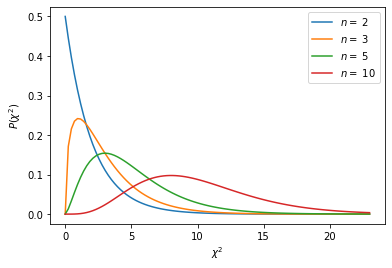

In [30]:
x = np.linspace(0, 23, 100)
for n in [2, 3, 5, 10]:
    plt.plot(x, chi2(x, n), label = '$n = $ %d'%(n))
plt.xlabel('$\chi^2$')
plt.ylabel('$P(\chi^2)$')
plt.legend()

Entonces si al final de nuestro ajuste obtenemos un $\chi^2$ tan grande que es poco probable, podemos concluir que el ajuste es malo en el sentido que las desviaciones respecto al modelo son grandes y no meramente debidas a fluctuaciones estadísticas.

Vemos que los valores más probables de $\chi^2$ crecen a medida que crecen los parámetros libres. Por eso es usual usar el $\chi^2$ dividido por el número de grados de libertad.

In [19]:
def chi2pdof(x, n):
    from scipy.special import gamma
    return n*2**(-n/2)*(n*x)**((n-2)/2)*np.exp(-x*n/2)/gamma(n/2)

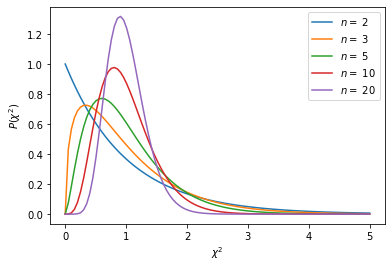

In [31]:
x = np.linspace(0, 5, 100)
for n in [2, 3, 5, 10, 20]:
    plt.plot(x, chi2pdof(x, n), label = '$n = $ %d'%(n))
plt.xlabel('$\chi^2$')
plt.ylabel('$P(\chi^2)$')
plt.legend()

Para ser un poco más cuantitativos, podemos calcular el valor de $\chi^2$ tal que la probabilidad de tener un valor mayor sea menor a $0.001$. Es decir, valores mayores que ese $\chi^2$ son un "mal ajuste" en el sentido que es poco probable que sean debidos a una fluctuación estadística (probabilidad $< 0.1\%$)

In [23]:
def chi2cum(x, n):
    from scipy.special import gammainc
    return gammainc(n/2, x/2)

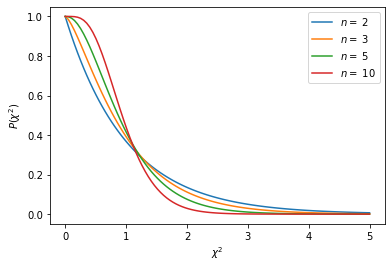

In [32]:
x = np.linspace(0, 5, 100)
for n in [2, 3, 5, 10]:
    plt.plot(x, 1-chi2cum(x*n, n), label = '$n = $ %d'%(n))
plt.xlabel('$\chi^2$')
plt.ylabel('$P(\chi^2)$')
plt.legend()

In [70]:
m = 100
c = 0.01
crits = np.zeros(m - 2)
ns = np.arange(2,m)
for i in range(2, m):
    
    def f(x):
        n = i
        from scipy.special import gammainc
        return 1 - gammainc(n/2, n*x/2) - c

    from scipy.optimize import root_scalar
    r = root_scalar(f, bracket=[0,10])
    crits[i-2] = r.root

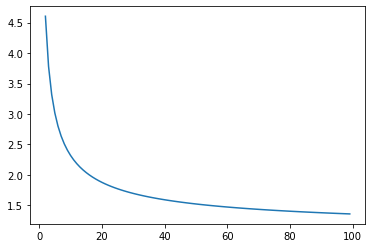

In [71]:
plt.plot(ns, crits)

In [76]:
c = 0.01
m = 100
crits = np.zeros(m - 2)
ns = np.arange(2,m)
for i in range(2, m):
    
    def f(x):
        n = i
        from scipy.special import gammainc
        return gammainc(n/2, n*x/2) - c

    from scipy.optimize import root_scalar
    r = root_scalar(f, bracket=[0,5])
    crits[i-2] = r.root

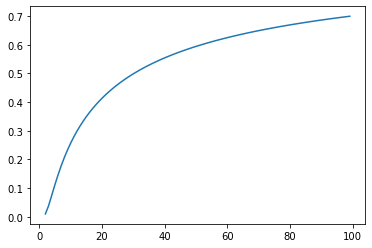

In [77]:
plt.plot(ns, crits)

Otra pregunta interesante es escoger cuál es el mejor modelo para describir un conjunto de datos (y no sólo el mejor valor de los parámetros). Esta pregunta es sutil y no tenemos tiempo para tratarla aquí, se deja a la curiosidad del estudiante.

## Estimadores y acumulación de datos

Encontrar los mejores parámetros de un modelo se llama estimar los parámetros y la minimización del $\chi^2$ nos da un estimador. Un estimador $\hat{a}$ "bueno" de una cantidad $a$ idealmente cumple tres propiedades:

* Consistencia: $\lim_{N\rightarrow \infty} \hat{a} = a$
* No sesgo: $\langle \hat{a} \rangle = a$
* Eficiencia: Que la varianza del estimador caiga lo suficientemente rápido con $N$.

Ahora supongamos que tenemos un conjunto de datos que sospechamos están descritos por una gaussiana. Queremos saber cuál es la media $\mu \equiv \langle x \rangle$ y la varianza $\sigma^2 \equiv \langle (x - \mu)^2\rangle $ que debemos estimar a partir de los datos.

Para estimar la media $\mu$ de la distribución, podemos usar el promedio de los datoss $\bar{x}$:

$$
\hat{\mu} = \bar{x} \equiv \frac{1}{N}\sum_i x_i
$$

su valor esperado es

$$
\langle \hat{\mu} \rangle = \frac{1}{N}\sum_i \langle x_i \rangle = \mu
$$

y su varianza es

$$
\langle (\hat{\mu} - \mu)^2 \rangle = \frac{1}{N^2}\left\langle \left(\sum_i (x_i - \mu)\right)^2\right\rangle = \frac{1}{N^2}\left\langle\sum_i (x_i - \mu)^2 \right\rangle - \frac{1}{N^2}\left\langle\sum_{i\neq j} (x_i - \mu)(x_j - \mu) \right\rangle = \frac{1}{N^2}\sum_i \left\langle (x_i - \mu)^2\right\rangle = \frac{\sigma^2}{N}
$$

por lo tanto, si quiero estimar el verdadero valor de $\mu$ usando el promedio, el error típico cometido es $\sigma/\sqrt{N}$. Esto implica que **el error de una medición es proporcional al inverso de la raíz cuadrada del número de datos** bajo la suposición de errores gaussianos iguales e independientes.

(array([ 10.,  29.,  94., 161., 272., 211., 135.,  62.,  20.,   6.]),
 array([0.90919016, 0.92826399, 0.94733783, 0.96641166, 0.9854855 ,
        1.00455933, 1.02363317, 1.042707  , 1.06178084, 1.08085467,
        1.09992851]),
 <a list of 10 Patch objects>)

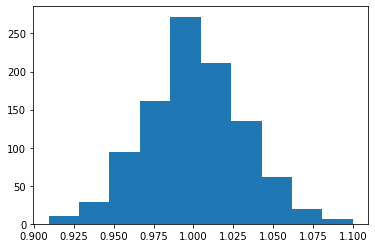

In [89]:
num = 1000
means = np.zeros(num)
for i in range(num):
    datos = np.random.normal(1, 0.1, 10)
    means[i] = datos.mean()

plt.hist(means)

In [90]:
means.std()

0.030679896504865703

In [91]:
0.1/np.sqrt(10)

0.03162277660168379

Para saber el error cometido sobre cada medición, nos gustaría saber $\sigma$, pero esta también la tenemos que estimar. Uno podría pensar que el siguiente estimador es bueno, pero resulta que es sesgado (recuerde que $\mu$ no lo conocemos, nos tenemos que acontentar con su estimador $\bar{x}$)

$$
\hat{\sigma^2} = \frac{1}{N}\sum_i(x_i - \bar{x})^2
$$

su valor esperado es

$$
\langle\hat{\sigma^2}\rangle = \frac{1}{N}\sum_i \langle(x_i - \bar{x})^2\rangle = \left\langle\frac{1}{N} \sum_i x_i^2 - \bar{x}^2 \right\rangle = \langle x^2 \rangle - \langle \bar{x}^2\rangle =  (\langle x^2 \rangle - \mu^2) - (\langle \bar{x}^2\rangle - \mu^2) = \sigma^2 - \frac{\sigma^2}{N} = \frac{N - 1}{N}\sigma^2
$$

entonces basta corregirlo dividiendo por ese factor y tenemos un buen estimador

$$
\hat{\sigma^2} = \frac{1}{N-1}\sum_i(x_i - \bar{x})^2
$$

**Cuidado, no hay que confundir cuatro conceptos similares:**

* La dispersión de los datos respecto a la media $\frac{1}{N}\sum_i(x_i - \bar{x})^2$
* La varianza de la distribución $\sigma^2 = \langle (x - \mu)^2 \rangle$
* La dispersión *de* la media: $\frac{\sigma^2}{N}$
* El estimador de la varianza: $\frac{1}{N-1}\sum_i(x_i - \bar{x})^2$

In [129]:
num = 10000
N = 4
means = np.zeros(num)
dispersion = np.zeros(num)
for i in range(num):
    datos = np.random.normal(1, 0.1, N)
    means[i] = datos.mean()
    dispersion[i] = datos.std()

var_estim = np.sqrt(N/(N-1))*dispersion

(array([ 328., 1376., 2267., 2364., 1862., 1055.,  491.,  184.,   61.,
          12.]),
 array([0.00504025, 0.02962017, 0.05420009, 0.07878001, 0.10335993,
        0.12793986, 0.15251978, 0.1770997 , 0.20167962, 0.22625954,
        0.25083946]),
 <a list of 10 Patch objects>)

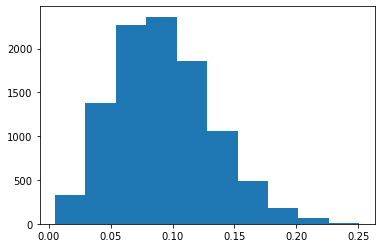

In [130]:
plt.hist(var_estim)

(array([ 328., 1376., 2267., 2364., 1862., 1055.,  491.,  184.,   61.,
          12.]),
 array([0.00436498, 0.02565182, 0.04693866, 0.06822549, 0.08951233,
        0.11079917, 0.132086  , 0.15337284, 0.17465967, 0.19594651,
        0.21723335]),
 <a list of 10 Patch objects>)

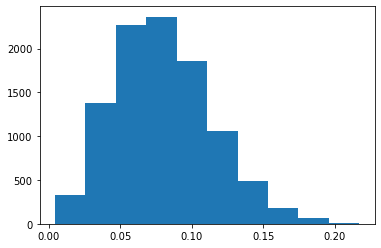

In [131]:
plt.hist(dispersion)

In [132]:
dispersion.mean()

0.07995166444386384

In [133]:
var_estim.mean()

0.09232022997764684